In [34]:
import os
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn.cluster import KMeans

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format

# shared modules
import ds_fun as d
import more_fun as m

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [35]:
df = d.pour_wine()

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [37]:
df = m.rename_col(df)

In [38]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5,red
1,7.80,0.88,0.00,2.60,0.10,25.00,67.00,1.00,3.20,0.68,9.80,5,red
2,7.80,0.76,0.04,2.30,0.09,15.00,54.00,1.00,3.26,0.65,9.80,5,red
3,11.20,0.28,0.56,1.90,0.07,17.00,60.00,1.00,3.16,0.58,9.80,6,red
4,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5,red


In [ ]:
df.shape

In [ ]:
df.quality.min(), df.quality.max()

In [ ]:
train, validate, test = d.train_validate(df)

In [ ]:
train.shape, validate.shape, test.shape

In [ ]:
#split
#explore on train
#stat tests on train
#choose features to take to modeling
#get to mvp
#maybe save feature engineering until after mvp

In [ ]:
train.head()

In [ ]:
train.info()

In [ ]:
d.outlier_detector(train,'quality')

In [ ]:
m.scatter_plot(train, train.fixed_acidity, train.volatile_acidity, 'acidity')

In [ ]:
m.line_plot(train, train.pH, train.quality, 'pH to quality')

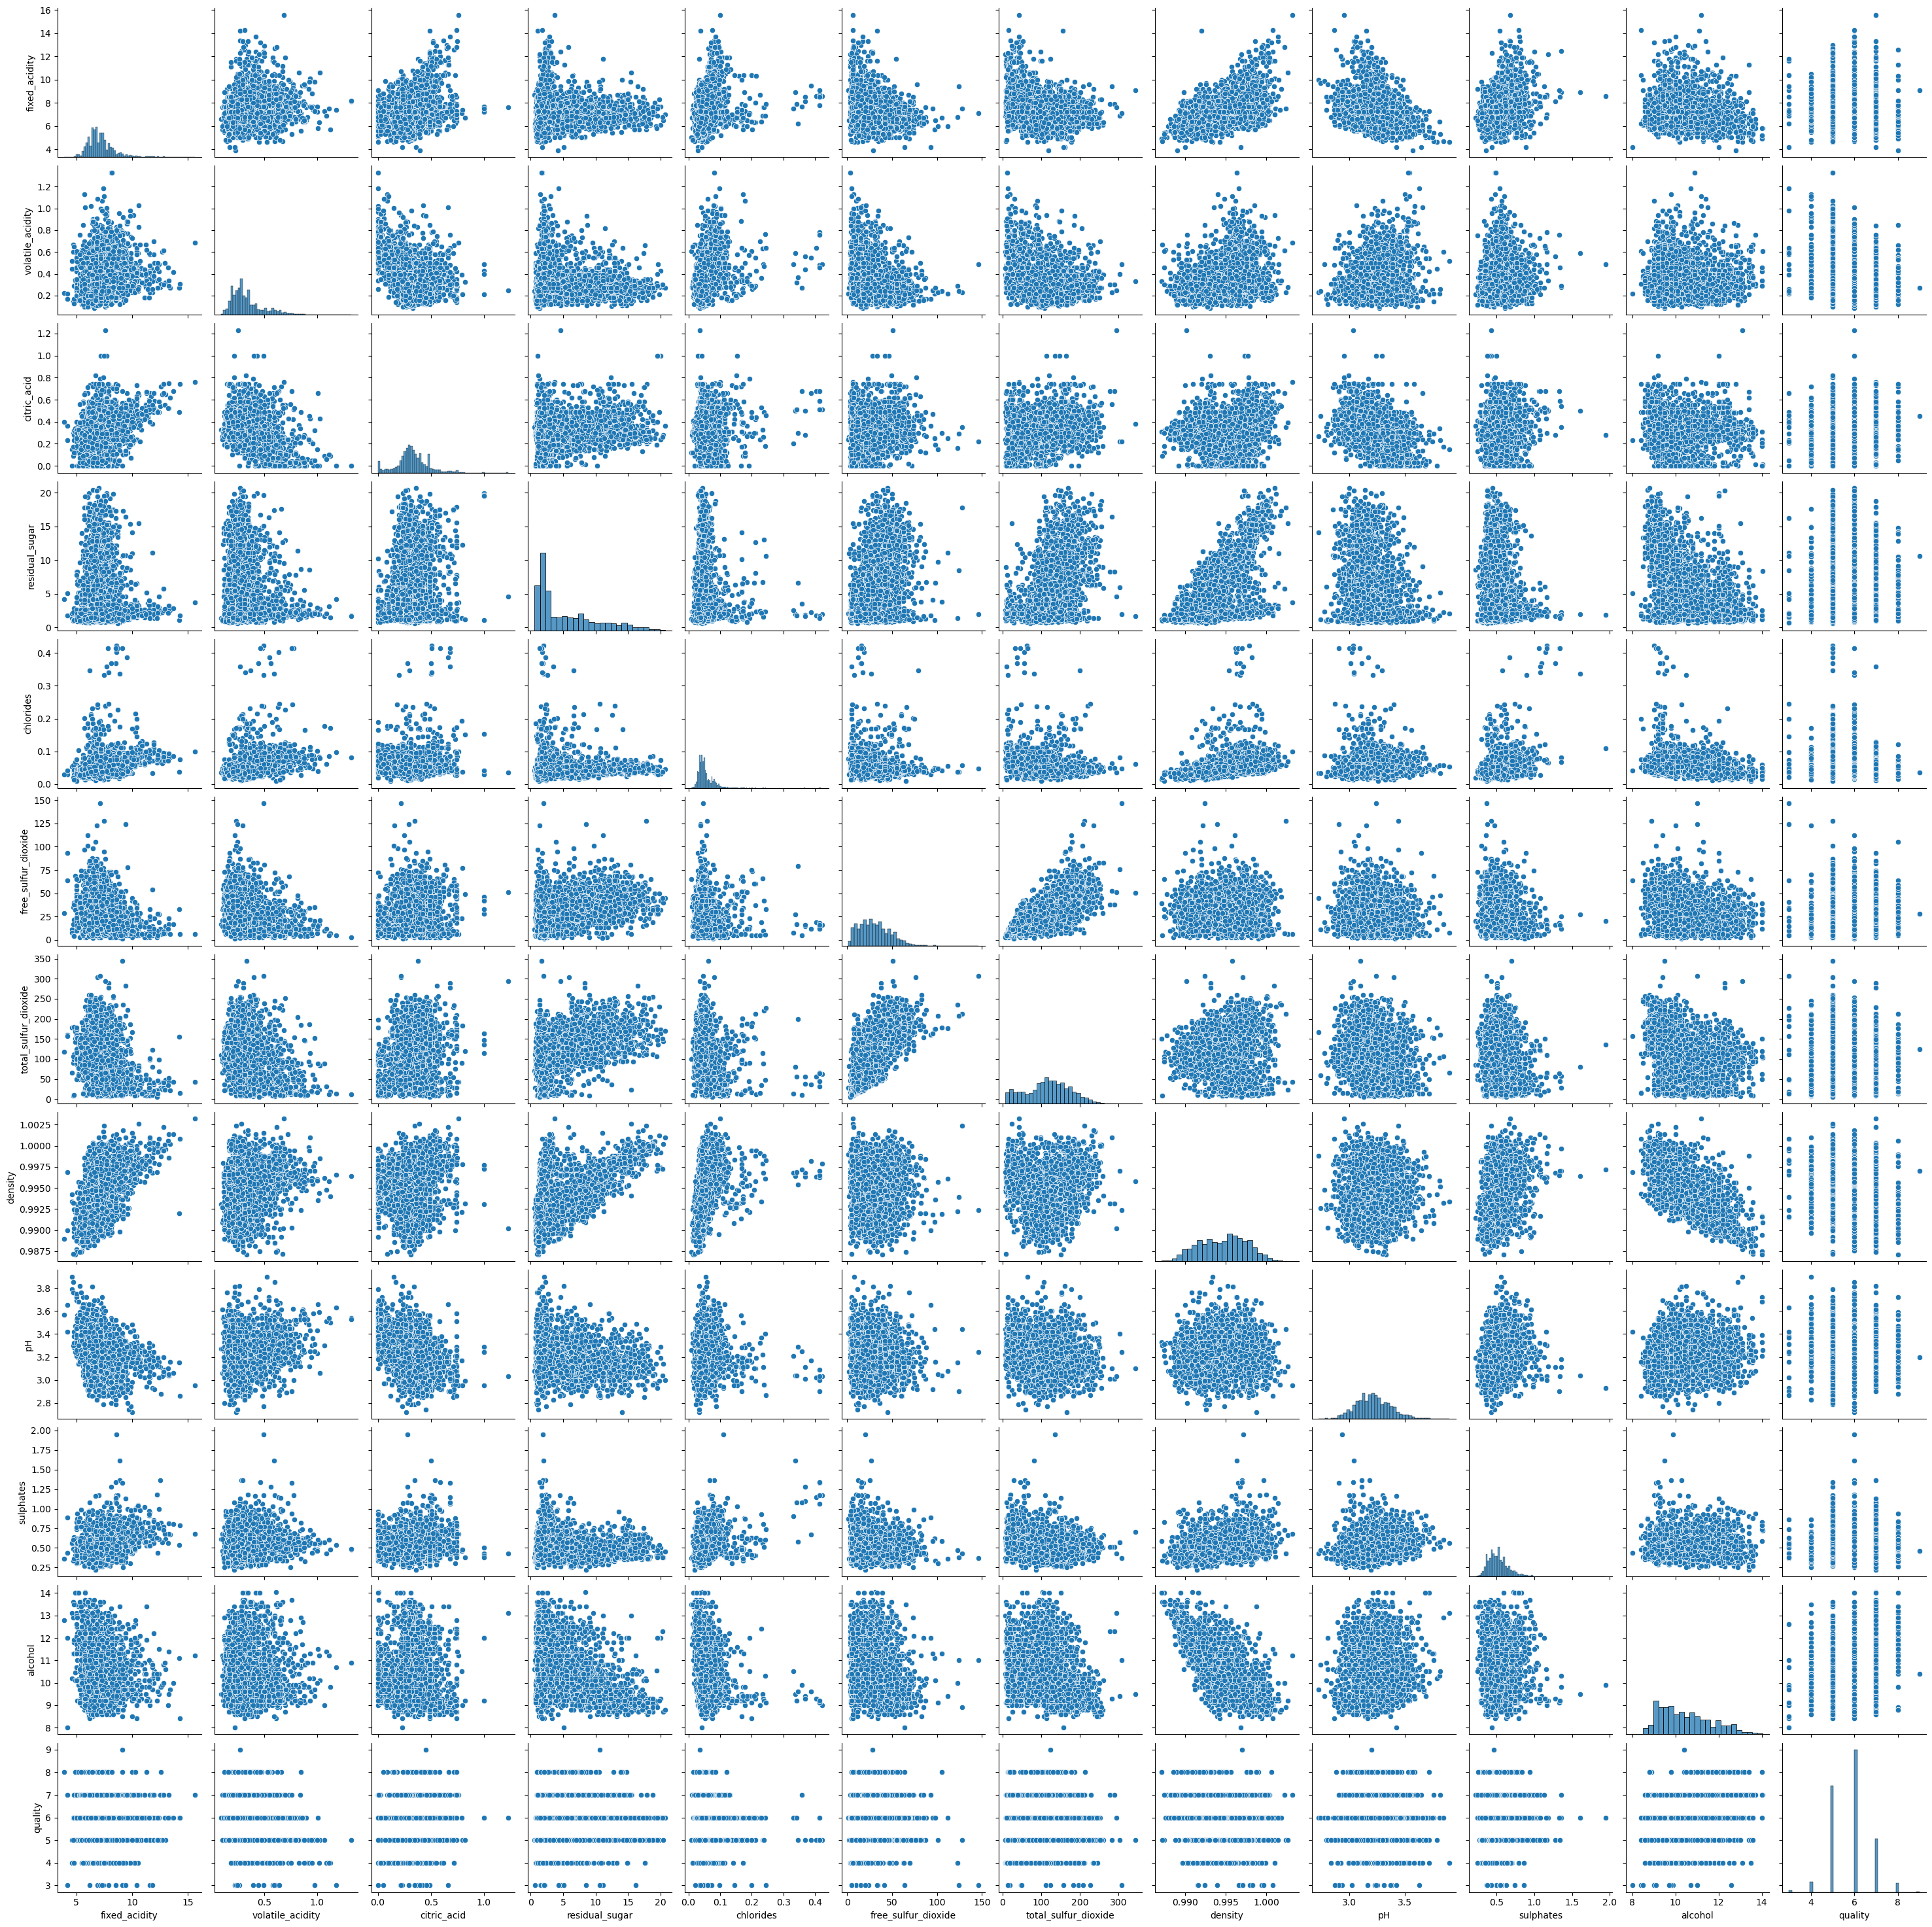

In [16]:
sns.pairplot(train)

In [17]:
# this includes split so do this earlier
# df = d.encode_and_dummies(train, 'type')

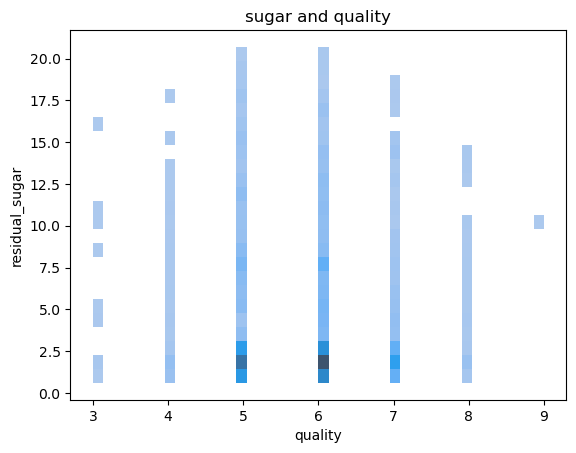

In [18]:
m.hist_plot(train, train.quality, train.residual_sugar, title= 'sugar and quality')

In [19]:
dummy_df = pd.get_dummies(train['type'])


In [20]:
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3118 entries, 3094 to 5100
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   red     3118 non-null   uint8
 1   white   3118 non-null   uint8
dtypes: uint8(2)
memory usage: 95.0 KB


In [21]:
# make a copy of the dataframe that is scaled
# would need both, scaled for clustering, unscaled for plotting

In [22]:
#plot a heatmap

In [23]:
cols_to_scale = ['fixed_acidity' , 'volatile_acidity' , 'citric_acid' , 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol'] 
train_scaled, validate_scaled, test_scaled = d.scale_cont_columns(train, validate, test, cols_to_scale, scaler_model= 1)

In [24]:
train_scaled.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
3094,0.32,0.16,0.40,0.45,0.05,0.30,0.57,0.42,0.35,0.09,0.71,7,white
2509,0.21,0.20,0.16,0.26,0.08,0.16,0.41,0.44,0.36,0.24,0.31,5,white
4420,0.23,0.25,0.37,0.28,0.11,0.28,0.70,0.60,0.66,0.22,0.31,5,white
2677,0.22,0.14,0.28,0.78,0.10,0.38,0.57,0.83,0.65,0.12,0.30,5,white
2507,0.35,0.12,0.30,0.45,0.11,0.15,0.45,0.67,0.51,0.14,0.30,4,white


In [25]:
X = train_scaled[['fixed_acidity' , 'volatile_acidity', 'alcohol']]

kmeans = KMeans(n_clusters= 3)
kmeans.fit(X)

train_scaled['acid_alc_cluster'] = kmeans.predict(X)

cluster = train_scaled.acid_alc_cluster

<AxesSubplot:xlabel='quality', ylabel='density'>

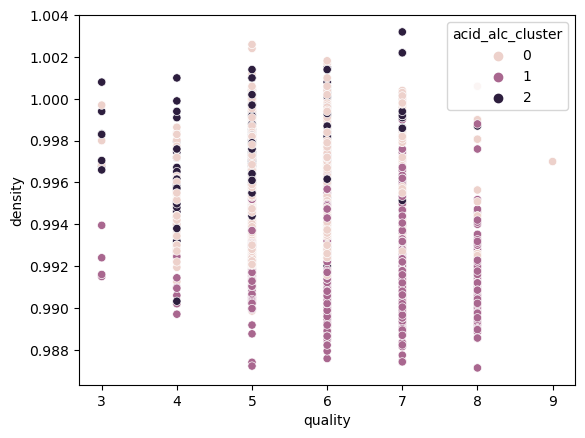

In [26]:
cluster_1 = sns.scatterplot(x = train.quality, y = train.density, hue = train_scaled.acid_alc_cluster)
cluster_1

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

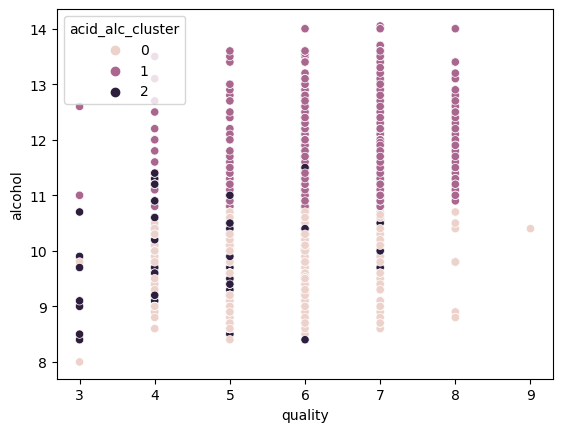

In [27]:
cluster_1 = sns.scatterplot(x = train.quality, y = train.alcohol, hue = train_scaled.acid_alc_cluster)
cluster_1

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3118 entries, 3094 to 5100
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         3118 non-null   float64
 1   volatile_acidity      3118 non-null   float64
 2   citric_acid           3118 non-null   float64
 3   residual_sugar        3118 non-null   float64
 4   chlorides             3118 non-null   float64
 5   free_sulfur_dioxide   3118 non-null   float64
 6   total_sulfur_dioxide  3118 non-null   float64
 7   density               3118 non-null   float64
 8   pH                    3118 non-null   float64
 9   sulphates             3118 non-null   float64
 10  alcohol               3118 non-null   float64
 11  quality               3118 non-null   int64  
 12  type                  3118 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 405.6+ KB


In [29]:
train.quality.mean()

5.817190506735087

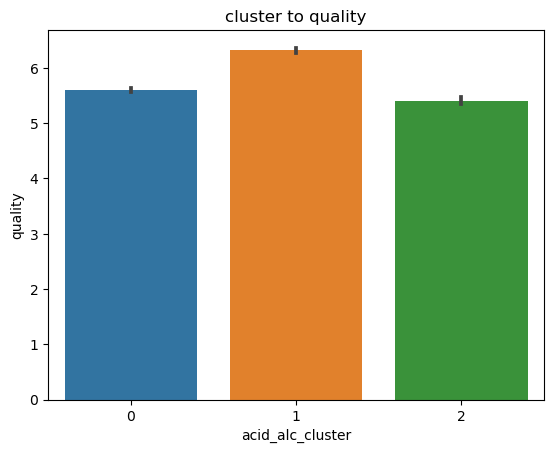

In [30]:
m.bar_chart(train_scaled, train_scaled.acid_alc_cluster, train_scaled.quality, 'cluster to quality')

In [31]:
train.quality

3094    7
2509    5
4420    5
2677    5
2507    4
       ..
4447    5
2468    6
1996    6
5431    5
5100    6
Name: quality, Length: 3118, dtype: int64

stats tests


questions I want to ask of the data:
1)  Does higher alcohol get higher quality scores?
2) Are fixed_acidity and volatile_acidity related?
3) Does higher residual_sugar score higher in quality?
4) Does red or white wine have higher quality scores?





In [32]:
# 1)  Does higher alcohol get higher quality scores?
#cont vs discrete 
#swarm or bar
#compare means, two sample t test
#Ho: alcohol is not related to quality
#Ha: alcohol is related
stats.ttest_1samp(train.alcohol, train.alcohol.mean())


Ttest_1sampResult(statistic=-2.238033213543889e-12, pvalue=0.9999999999982144)

In [33]:
# 2) Are fixed_acidity and volatile_acidity related?